# Multi Classification

In [1]:
# Import Library
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Data (Preparing and Loading)

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/arya.hisma/Downloads/000. UDEMY/Udemy - Pytorch/Logistic Regression Using Pytorch - Customer Churn/dataset/iris_dataset_with_categorical_labels.csv")

# Display data
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
# Hapus missing value

df = df.dropna()
df.shape

(150, 5)

In [7]:
# Remove unnecessary columns
df_clean = df.drop([], axis=1)
df_clean.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Data Info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding species jadi angka 0,1,2
le = LabelEncoder()
df_clean['species'] = le.fit_transform(df_clean['species'])

In [10]:
df_clean.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Tentukan fitur dan label
X = df_clean.drop('species', axis=1)
y = df_clean['species']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [13]:
numerical_cols, categorical_cols

(Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'),
 Index([], dtype='object'))

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Buat Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols) # Scaling kolom numerik
        # ('cat', OneHotEncoder(drop='first'), categorical_cols) # OneHot kolom kategorikal
    ]
)

In [15]:
# Buat Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object'))]))])

In [16]:
# Split Train Test Split
X_train, X_test, y_train, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Transform X_train dan X_test
X_train_processed = pipeline.fit_transform(X_train)  
X_test_processed = pipeline.transform(X_test)

In [18]:
X_train_processed

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [19]:
X_test_processed

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282],
       [-1.10824606,  0.08570939, -1.27600637, -1.44608785],
       [-0.86445224,  1.65083742, -1.27600637, -1.17911778],
       [ 0.59831066,  0.53288883,  0.55777524,  0.55618763],
       [ 0.84210448, -0.

In [20]:
# # Ambil nama kolom hasil one hot encoder dan scaling
# ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
# encoded_col_names = ohe.get_feature_names_out(categorical_cols)
# encoded_col_names

In [21]:
# # Gabungkan semua nama kolom : fitur numerik + fitur kategorikal encoded
# final_feature_names = list(numerical_cols) + list(encoded_col_names)
# final_feature_names

In [22]:
X_train_processed[0]

array([-1.47393679,  1.20365799, -1.56253475, -1.31260282])

In [23]:
# Tentukan Kolom
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
categorical_onehot_cols = []
categorical_ordinal_cols = []

In [24]:
# Buat Transformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_cols)
        # ('onehot', OneHotEncoder(drop='first'), categorical_onehot_cols),
        # ('ordinal', OrdinalEncoder(), categorical_ordinal_cols)
    ]
)

In [25]:
# Buat Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])]))])

In [26]:
# Split Data Train Test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [27]:
X_train.shape

(120, 4)

In [28]:
# Fit Transform
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [29]:
X_train.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2


In [30]:
X_train_processed[0]

array([-1.72156775, -0.33210111, -1.34572231, -1.32327558])

In [31]:
# # Ambil Transformers
# ohe = pipeline.named_steps['preprocessor'].named_transformers_['onehot']
# ordinal = pipeline.named_steps['preprocessor'].named_transformers_['ordinal']

# ohe, ordinal

In [32]:
# # Ambil Nama Kolom Hasil One Hot Encoder
# onehot_feature_names = ohe.get_feature_names_out(categorical_onehot_cols)

# # Gabungkan Semua Kolom
# final_feature_names = (
#     numerical_cols +
#     list(onehot_feature_names) +
#     categorical_ordinal_cols
# )

# final_feature_names

In [33]:
# # Cek Hasil Encoding
# # Ambil Encodernya
# ordinal_encoder = pipeline.named_steps['preprocessor'].named_transformers_['ordinal']
# print(ordinal_encoder.categories_)
# categories = ordinal_encoder.categories_

# # Gabungkan jadi dict nama kolom dan kategorinya
# ordinal_col_info = dict(zip(categorical_ordinal_cols, categories))

# for col, cat in ordinal_col_info.items():
#     print(f"{col}: {list(cat)}")

# # Tampilkan Hasil Mapping Kategori ke Angka
# for cols, cats in zip(categorical_ordinal_cols, ordinal_encoder.categories_):
#     print(f"Kolom {cols} kategori : angka")
    
#     for i, cat in enumerate(cats):
#         print(f"{cat} : {i}")

In [34]:
# Data Yang Dipakai
X_train_processed.shape, X_test_processed.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [35]:
type(X_train_processed), type(X_test_processed), type(y_train), type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [36]:
# Create model
# konversi ke tensor pytorch (karena format sebelumnya adalah dataframe, maka diganti terlebih dahulu ke numpy)
X_train_tensor = torch.tensor(X_train_processed,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_processed,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# X_train_tensor = torch.tensor(X_train)
# X_test_tensor = torch.tensor(X_test)
# y_train_tensor = torch.tensor(y_train).unsqueeze(dim=1)
# y_test_tensor = torch.tensor(y_test).unsqueeze(dim=1)

X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

In [37]:
print(torch.unique(y_train_tensor)) 

tensor([0, 1, 2])


In [38]:
y_train_tensor

tensor([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0,
        1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0,
        0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0,
        0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2,
        2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [39]:
X_train_tensor.shape[1]

4

In [ ]:
# LR Model 1

# class LRModel (nn.Module):
#     def __init__(self, input_dim):
#         super(LRModel, self).__init__()
#         self.linear = nn.Linear(input_dim, 1)
        
#     def forward(self, x):
#         return torch.sigmoid(self.linear(x))

input_dim = X_train_tensor.shape[1]
output_dim = df_clean['species'].nunique()
print(input_dim)
print(output_dim)

model1 = nn.Sequential(
    nn.Linear(input_dim, 16),
    nn.ReLU(),
    nn.Linear(16, output_dim)  # 3 kelas output
)

model1

4
3


Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)

In [41]:
# Loss & Optimize

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

In [42]:
# Training Loop
torch.manual_seed(42)

epochs = 1000
losses_train = []
losses_test = []

for epoch in range(epochs):
    model1.train()
    
    output_train = model1(X_train_tensor)

    loss_train = criterion(output_train,  y_train_tensor)
    
    losses_train.append(loss_train.item())
    
    _, output_label_train = torch.max(output_train, 1)
        
    accuracy_train = (output_label_train == y_train_tensor).float().mean()
        
    optimizer.zero_grad()
    
    loss_train.backward()
    
    optimizer.step()
    
    # Evaluasi akurasi
    from sklearn.metrics import confusion_matrix, classification_report

    model1.eval()
    with torch.no_grad():
        output_test = model1(X_test_tensor)
        
        loss_test = criterion(output_test,  y_test_tensor)
        
        losses_test.append(loss_test.item())
        
        _, output_label_test = torch.max(output_test, 1)
                
        accuracy_test = (output_label_test == y_test_tensor).float().mean()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch : [{epoch+1}/{epochs}] | Loss_train : {loss_train.item():.4f} | Loss_test : {loss_test.item():.4f} | Accuracy_train : {accuracy_train:.4f}  | Accuracy Test : {accuracy_test:.4f}")

Epoch : [10/1000] | Loss_train : 0.9618 | Loss_test : 0.9715 | Accuracy_train : 0.6500  | Accuracy Test : 0.6667
Epoch : [20/1000] | Loss_train : 0.6999 | Loss_test : 0.7292 | Accuracy_train : 0.7583  | Accuracy Test : 0.7000
Epoch : [30/1000] | Loss_train : 0.4787 | Loss_test : 0.5342 | Accuracy_train : 0.8083  | Accuracy Test : 0.7000
Epoch : [40/1000] | Loss_train : 0.3571 | Loss_test : 0.4172 | Accuracy_train : 0.8750  | Accuracy Test : 0.7333
Epoch : [50/1000] | Loss_train : 0.2843 | Loss_test : 0.3311 | Accuracy_train : 0.9167  | Accuracy Test : 0.8667
Epoch : [60/1000] | Loss_train : 0.2321 | Loss_test : 0.2785 | Accuracy_train : 0.9417  | Accuracy Test : 0.8667
Epoch : [70/1000] | Loss_train : 0.1903 | Loss_test : 0.2321 | Accuracy_train : 0.9417  | Accuracy Test : 0.9000
Epoch : [80/1000] | Loss_train : 0.1557 | Loss_test : 0.1916 | Accuracy_train : 0.9583  | Accuracy Test : 0.9667
Epoch : [90/1000] | Loss_train : 0.1282 | Loss_test : 0.1591 | Accuracy_train : 0.9583  | Accura

In [43]:
# konversi ke numpy untuk sklearn
y_true_train = y_train_tensor.numpy()
y_pred_train = output_label_train.numpy()

# Confusion matrix data train
cm_train = confusion_matrix(y_true_train, y_pred_train)
print(f"confusion matrix : {cm_train}")

# Classification report (precision, recall, f1-score) data train
cr_train = classification_report(y_true_train, y_pred_train)
print(f"Classification report : {cr_train}")

confusion matrix : [[40  0  0]
 [ 0 39  1]
 [ 0  1 39]]
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [44]:
# konversi ke numpy untuk sklearn
y_true_test = y_test_tensor.numpy()
y_pred_test = output_label_test.numpy()
        
# Confusion matrix data test
cm_test = confusion_matrix(y_true_test, y_pred_test)
print(f"confusion matrix : {cm_test}")

# Classification report (precision, recall, f1-score) data test
cr_test = classification_report(y_true_test, y_pred_test)
print(f"Classification report : {cr_test}")

confusion matrix : [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



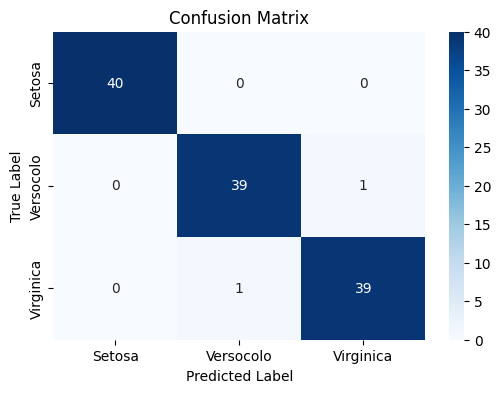

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versocolo', 'Virginica'], 
            yticklabels=['Setosa', 'Versocolo', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

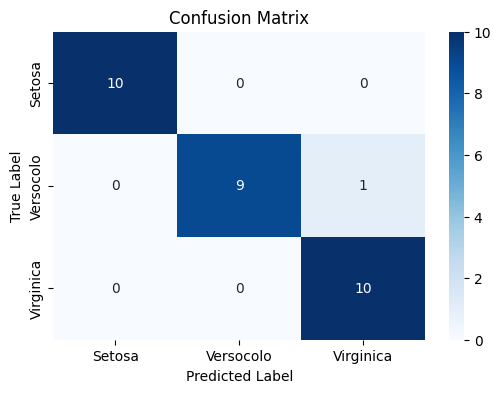

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versocolo', 'Virginica'], 
            yticklabels=['Setosa', 'Versocolo', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
type(output_label_test)

torch.Tensor

In [48]:
type(y_test_tensor)

torch.Tensor

In [49]:
print(losses_train)
print(losses_test)

[1.1894290447235107, 1.1587008237838745, 1.1301093101501465, 1.1034671068191528, 1.0785162448883057, 1.05461847782135, 1.031367301940918, 1.00834059715271, 0.9851477742195129, 0.9617949724197388, 0.9381565451622009, 0.9137449860572815, 0.8884166479110718, 0.8624764084815979, 0.8359278440475464, 0.8090188503265381, 0.7819889783859253, 0.7547496557235718, 0.727234423160553, 0.699851930141449, 0.672828733921051, 0.6464939713478088, 0.6210981011390686, 0.5968466997146606, 0.5739533305168152, 0.5522487759590149, 0.5318911075592041, 0.5128887891769409, 0.4951950013637543, 0.47869884967803955, 0.4632647931575775, 0.448729932308197, 0.4349941611289978, 0.42204704880714417, 0.4098120629787445, 0.3982052803039551, 0.3871617913246155, 0.37661978602409363, 0.366597980260849, 0.3570935130119324, 0.3480840027332306, 0.3395904302597046, 0.3315800130367279, 0.3239649534225464, 0.3166576325893402, 0.3096795380115509, 0.30299216508865356, 0.29655754566192627, 0.2903304994106293, 0.28426793217658997, 0.2

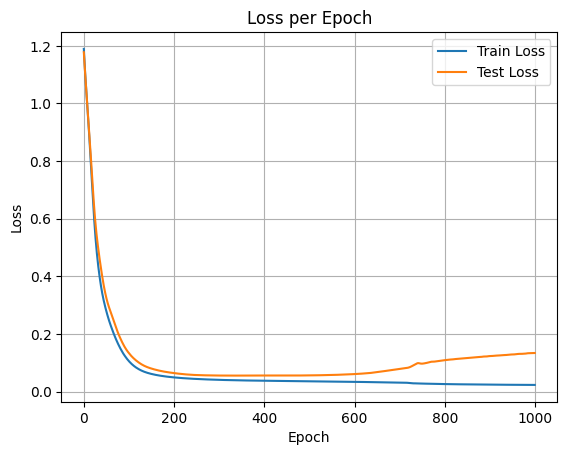

In [50]:
# Plot loss per epoch
plt.plot(range(epochs), losses_train, label='Train Loss')
plt.plot(range(epochs), losses_test, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# class LRModel2 (nn.Module):
#     def __init__(self, input_dim):
#         super(LRModel2, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 16)
#         self.relu = nn.ReLU()
#         self.output = nn.Linear(16, 1)
        
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.output(x)
#         return torch.sigmoid(x)

model2 = nn.Sequential(
    nn.Linear(input_dim, 16),
    nn.ReLU(),
    nn.Linear(16, output_dim)
)

model2

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=3, bias=True)
)

In [52]:
# Loss & Optimize

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

In [53]:
# Training Loop
torch.manual_seed(42)

epochs = 1000
losses_train = []
losses_test = []

for epoch in range(epochs):
    model2.train()
    
    output_train = model2(X_train_tensor)

    loss_train = criterion(output_train,  y_train_tensor)
    
    losses_train.append(loss_train.item())
    
    _, output_label_train = torch.max(output_train, 1)
        
    accuracy_train = (output_label_train == y_train_tensor).float().mean()
        
    optimizer.zero_grad()
    
    loss_train.backward()
    
    optimizer.step()
    
    # Evaluasi akurasi
    from sklearn.metrics import confusion_matrix, classification_report

    model1.eval()
    with torch.no_grad():
        output_test = model2(X_test_tensor)
        
        loss_test = criterion(output_test,  y_test_tensor)
        
        losses_test.append(loss_test.item())
        
        _, output_label_test = torch.max(output_test, 1)
                
        accuracy_test = (output_label_test == y_test_tensor).float().mean()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch : [{epoch+1}/{epochs}] | Loss_train : {loss_train.item():.4f} | Loss_test : {loss_test.item():.4f} | Accuracy_train : {accuracy_train:.4f}  | Accuracy Test : {accuracy_test:.4f}")

Epoch : [10/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [20/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [30/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [40/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [50/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [60/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [70/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [80/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accuracy Test : 0.4333
Epoch : [90/1000] | Loss_train : 1.0461 | Loss_test : 1.0433 | Accuracy_train : 0.3667  | Accura

In [54]:
# konversi ke numpy untuk sklearn
y_true_train = y_train_tensor.numpy()
y_pred_train = output_label_train.numpy()
    
# Confusion matrix data train
cm_train = confusion_matrix(y_true_train, y_pred_train)
print(f"confusion matrix : {cm_train}")

# Classification report (precision, recall, f1-score) data train
cr_train = classification_report(y_true_train, y_pred_train)
print(f"Classification report : {cr_train}")

confusion matrix : [[40  0  0]
 [36  4  0]
 [37  3  0]]
Classification report :               precision    recall  f1-score   support

           0       0.35      1.00      0.52        40
           1       0.57      0.10      0.17        40
           2       0.00      0.00      0.00        40

    accuracy                           0.37       120
   macro avg       0.31      0.37      0.23       120
weighted avg       0.31      0.37      0.23       120



c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
# konversi ke numpy untuk sklearn
y_true_test = y_test_tensor.numpy()
y_pred_test = output_label_test.numpy()
        
# Confusion matrix data test
cm_test = confusion_matrix(y_true_test, y_pred_test)
print(f"confusion matrix : {cm_test}")

# Classification report (precision, recall, f1-score) data test
cr_test = classification_report(y_true_test, y_pred_test)
print(f"Classification report : {cr_test}")

confusion matrix : [[10  0  0]
 [ 7  3  0]
 [10  0  0]]
Classification report :               precision    recall  f1-score   support

           0       0.37      1.00      0.54        10
           1       1.00      0.30      0.46        10
           2       0.00      0.00      0.00        10

    accuracy                           0.43        30
   macro avg       0.46      0.43      0.33        30
weighted avg       0.46      0.43      0.33        30



c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arya.hisma\venv\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


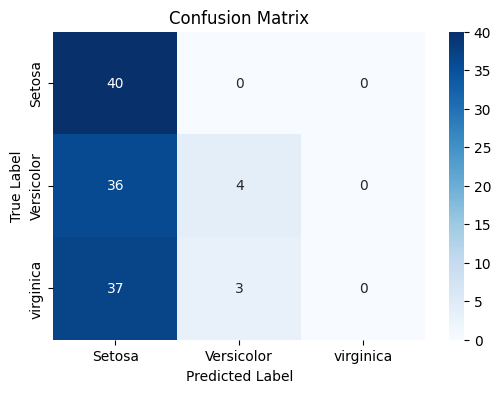

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

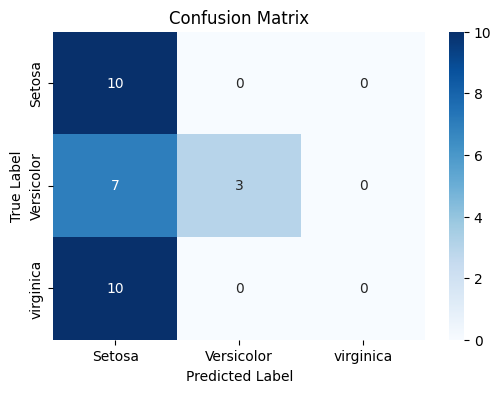

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(losses_train)
print(losses_test)

[1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398, 1.0460577011108398,

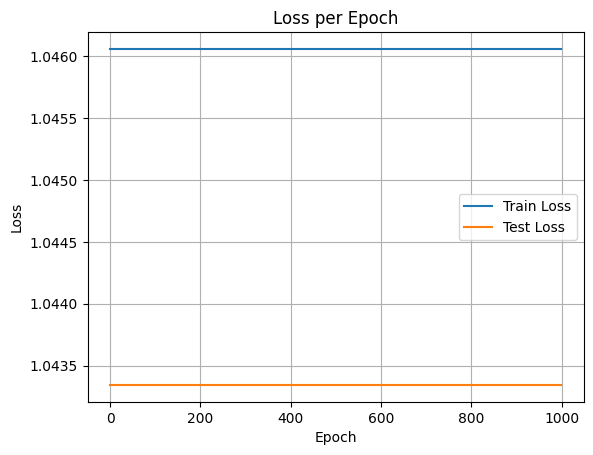

In [59]:
# Plot loss per epoch
plt.plot(range(epochs), losses_train, label='Train Loss')
plt.plot(range(epochs), losses_test, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# class LRModel3 (nn.Module):
#     def __init__(self, input_dim):
#         super(LRModel3, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 32)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(32, 16)
#         self.relu2 = nn.ReLU()
#         self.output = nn.Linear(16, 1)
        
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu1(x)
#         x = self.fc2(x)
#         x = self.relu2(x)
#         x = self.output(x)
#         return torch.sigmoid(x)


model3 = nn.Sequential(
    nn.Linear(input_dim, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, output_dim)
)

model3

Sequential(
  (0): Linear(in_features=4, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.01)

In [62]:
# Training Loop
torch.manual_seed(42)

epochs = 1000
losses_train = []
losses_test = []

for epoch in range(epochs):
    model3.train()
    
    output_train = model3(X_train_tensor)

    loss_train = criterion(output_train,  y_train_tensor)
    
    losses_train.append(loss_train.item())
    
    _, output_label_train = torch.max(output_train, 1)
        
    accuracy_train = (output_label_train == y_train_tensor).float().mean()
        
    optimizer.zero_grad()
    
    loss_train.backward()
    
    optimizer.step()
    
    # Evaluasi akurasi
    from sklearn.metrics import confusion_matrix, classification_report

    model1.eval()
    with torch.no_grad():
        output_test = model3(X_test_tensor)
        
        loss_test = criterion(output_test,  y_test_tensor)
        
        losses_test.append(loss_test.item())
        
        _, output_label_test = torch.max(output_test, 1)
                
        accuracy_test = (output_label_test == y_test_tensor).float().mean()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch : [{epoch+1}/{epochs}] | Loss_train : {loss_train.item():.4f} | Loss_test : {loss_test.item():.4f} | Accuracy_train : {accuracy_train:.4f}  | Accuracy Test : {accuracy_test:.4f}")

Epoch : [10/1000] | Loss_train : 0.5372 | Loss_test : 0.5530 | Accuracy_train : 0.7750  | Accuracy Test : 0.7000
Epoch : [20/1000] | Loss_train : 0.2278 | Loss_test : 0.2587 | Accuracy_train : 0.9417  | Accuracy Test : 0.8667
Epoch : [30/1000] | Loss_train : 0.0993 | Loss_test : 0.1318 | Accuracy_train : 0.9667  | Accuracy Test : 0.9333
Epoch : [40/1000] | Loss_train : 0.0545 | Loss_test : 0.0741 | Accuracy_train : 0.9750  | Accuracy Test : 0.9667
Epoch : [50/1000] | Loss_train : 0.0417 | Loss_test : 0.0704 | Accuracy_train : 0.9833  | Accuracy Test : 0.9667
Epoch : [60/1000] | Loss_train : 0.0371 | Loss_test : 0.0633 | Accuracy_train : 0.9833  | Accuracy Test : 0.9667
Epoch : [70/1000] | Loss_train : 0.0345 | Loss_test : 0.0724 | Accuracy_train : 0.9833  | Accuracy Test : 0.9667
Epoch : [80/1000] | Loss_train : 0.0330 | Loss_test : 0.0765 | Accuracy_train : 0.9833  | Accuracy Test : 0.9667
Epoch : [90/1000] | Loss_train : 0.0317 | Loss_test : 0.0842 | Accuracy_train : 0.9833  | Accura

In [63]:
# konversi ke numpy untuk sklearn
y_true_train = y_train_tensor.numpy()
y_pred_train = output_label_train.numpy()
    
# Confusion matrix data train
cm_train = confusion_matrix(y_true_train, y_pred_train)
print(f"confusion matrix : {cm_train}")

# Classification report (precision, recall, f1-score) data train
cr_train = classification_report(y_true_train, y_pred_train)
print(f"Classification report : {cr_train}")

confusion matrix : [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [64]:
# konversi ke numpy untuk sklearn
y_true_test = y_test_tensor.numpy()
y_pred_test = output_label_test.numpy()

# Confusion matrix data test
cm_test = confusion_matrix(y_true_test, y_pred_test)
print(f"confusion matrix : {cm_test}")

# Classification report (precision, recall, f1-score) data test
cr_test = classification_report(y_true_test, y_pred_test)
print(f"Classification report : {cr_test}")

confusion matrix : [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



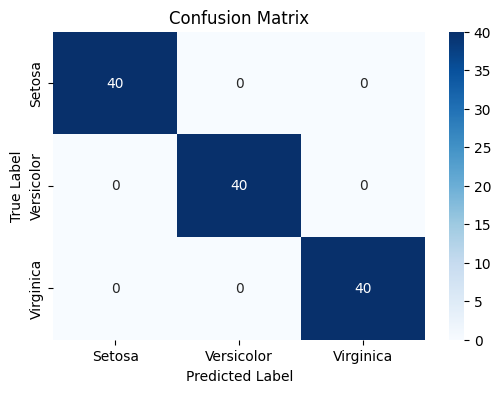

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

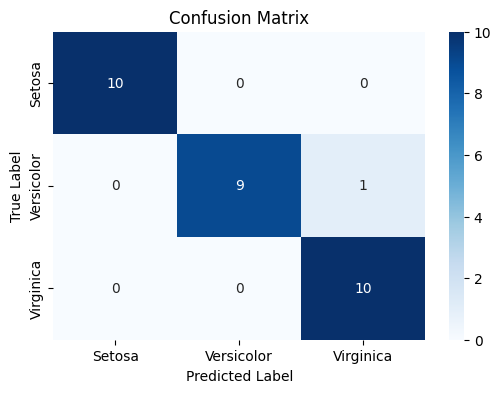

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [67]:
print(losses_train)
print(losses_test)

[1.088560700416565, 1.0222581624984741, 0.9573547840118408, 0.8930256962776184, 0.8289355039596558, 0.7648380994796753, 0.7025951743125916, 0.6426219940185547, 0.5869491100311279, 0.5371797680854797, 0.4931897222995758, 0.4542202353477478, 0.4180966019630432, 0.38381341099739075, 0.3510451912879944, 0.3208552896976471, 0.29367485642433167, 0.269454687833786, 0.2477618008852005, 0.22776950895786285, 0.20885032415390015, 0.1912401020526886, 0.17569518089294434, 0.16249045729637146, 0.15079718828201294, 0.1394931524991989, 0.12828513979911804, 0.11756507307291031, 0.10791300982236862, 0.09933075308799744, 0.0916263535618782, 0.08458852022886276, 0.07869961112737656, 0.07408450543880463, 0.07013989984989166, 0.06636110693216324, 0.06268434226512909, 0.05955030769109726, 0.056944914162158966, 0.05450552701950073, 0.05214645713567734, 0.05011504516005516, 0.048532404005527496, 0.04719341918826103, 0.045911755412817, 0.04478299990296364, 0.04394613951444626, 0.04324967786669731, 0.04247957095

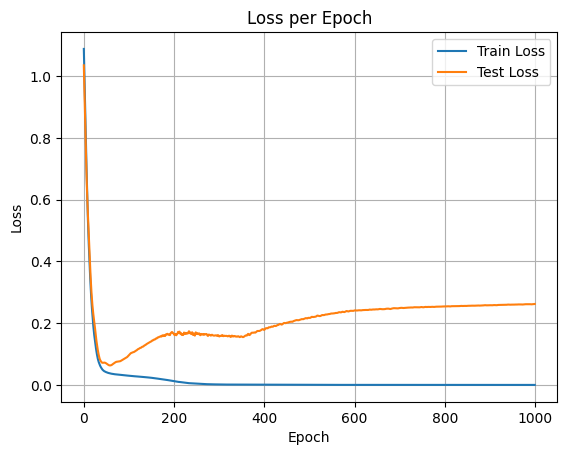

In [68]:
# Plot loss per epoch
plt.plot(range(epochs), losses_train, label='Train Loss')
plt.plot(range(epochs), losses_test, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# Simpan Model

import torch

torch.save(model3, 'app/model/multi_class/model_churn3.pth')

In [71]:
# Simpan Pipeline
import joblib

joblib.dump(pipeline, 'app/model/multi_class/preprocessing_pipeline.pkl')

['app/model/multi_class/preprocessing_pipeline.pkl']

In [73]:
input_data = {
    'sepal length (cm)' : [5.1],
    'sepal width (cm)' : [3.5],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.2]
    }

input_df = pd.DataFrame(input_data)
input_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [74]:
# Load Preprocessed Data
pipeline_loaded = joblib.load('app/model/multi_class/preprocessing_pipeline.pkl')

In [75]:
# Transform Input Data
input_processed = pipeline_loaded.transform(input_df)
input_processed

array([[-0.88566202,  1.01122923, -1.34572231, -1.32327558]])

In [76]:
# Ubah menjadi tensor
input_tensor = torch.tensor(input_processed, dtype=torch.float32)
input_tensor

tensor([[-0.8857,  1.0112, -1.3457, -1.3233]])

In [77]:
# Prediksi dengan model
# Load Model
model3 = torch.load('app/model/multi_class/model_churn3.pth', weights_only=False)
model3

Sequential(
  (0): Linear(in_features=4, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [79]:
import torch.nn.functional as F

# Prediksi
with torch.no_grad():
    output = model3(input_tensor)

print(f"Output logits: {output}")

# Menghitung probabilitas tiap kelas menggunakan softmax
probabilities = F.softmax(output, dim=1)
print(f"Probabilitas per kelas: {probabilities}")

# Mengambil label prediksi (kelas dengan probabilitas tertinggi)
pred_label = torch.argmax(probabilities, dim=1).item()
print(f"Prediksi kelas: {pred_label}")


Output logits: tensor([[ 16.1341,  -5.5791, -17.1111]])
Probabilitas per kelas: tensor([[1.0000e+00, 3.7163e-10, 3.6459e-15]])
Prediksi kelas: 0


In [80]:
label_mapping = {0: "setosa", 1: "versicolor", 2: "virginica"}
print(f"Prediksi: {label_mapping[pred_label]}")


Prediksi: setosa


In [81]:
from torchinfo import summary

summary(model3)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            160
├─ReLU: 1-2                              --
├─Linear: 1-3                            528
├─ReLU: 1-4                              --
├─Linear: 1-5                            51
Total params: 739
Trainable params: 739
Non-trainable params: 0

In [82]:
from torchinfo import summary

summary(model2)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            80
├─ReLU: 1-2                              --
├─Linear: 1-3                            51
Total params: 131
Trainable params: 131
Non-trainable params: 0

In [83]:
from torchinfo import summary

summary(model1)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            50
├─ReLU: 1-2                              --
├─Linear: 1-3                            33
Total params: 83
Trainable params: 83
Non-trainable params: 0